<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">From 13h30 To 17h30 - 14/11/2021</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: Đinh Viết Trung
- Date of birth: 02/06/1999
- Place of birth: Nam Định
- Email: dvtrung99@gmail.com
- Mobile phone: 0906051685

In this notebook, we practice all the knowledge and skills that we learned in this course (LDS5: Data pre-processing and analysis)

We apply the **Logistic Regression Algorithm** to predict: **"Whether a loan is paid off on in collection"** by accuracy evaluation methods.

Lets first load required libraries:

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import iqr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<IPython.core.display.Javascript object>

In [20]:
import warnings

warnings.filterwarnings("ignore")

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### About dataset

This dataset is about past loans. The __loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 

### Load Data From CSV File  

In [21]:
# Read CSV file: loan_train.csv
df = pd.read_csv("loan_train.csv", usecols=[2, 3, 4, 5, 6, 7, 8, 9])


<IPython.core.display.Javascript object>

### Understanding to dataset

In [22]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


<IPython.core.display.Javascript object>

In [23]:
df.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


<IPython.core.display.Javascript object>

In [24]:
print(df.shape)

(346, 8)


<IPython.core.display.Javascript object>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


<IPython.core.display.Javascript object>

In [26]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


<IPython.core.display.Javascript object>

In [27]:
"""
df ko chứa giá trị null
"""

'\ndf ko chứa giá trị null\n'

<IPython.core.display.Javascript object>

### Identify Variables

In [28]:
df["loan_status"].unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

<IPython.core.display.Javascript object>

In [29]:
"""
input: <> loan_status (tất cả các features của df trừ loan_status)
output: loan_status

variable type: 
    predict: <> loan_status (tất cả các features của df trừ Y1 và Y2)
    target: loan_status

data type:
    object (string, ...) 
    numeric (int, float)

"""

'\ninput: <> loan_status (tất cả các features của df trừ loan_status)\noutput: loan_status\n\nvariable type: \n    predict: <> loan_status (tất cả các features của df trừ Y1 và Y2)\n    target: loan_status\n\ndata type:\n    object (string, ...) \n    numeric (int, float)\n\n'

<IPython.core.display.Javascript object>

In [30]:
# quantitative
numbers = [i for i in df.columns if df.dtypes[i] != "object"]

#qualitative
objects = [i for i in df.columns if df.dtypes[i] == "object"] 


<IPython.core.display.Javascript object>

In [31]:
i = 0
for obj in objects:
    print(i, "/", obj, "\t len=", len(df[obj].unique()), ":", df[obj].unique())
    i = i + 1

0 / loan_status 	 len= 2 : ['PAIDOFF' 'COLLECTION']
1 / effective_date 	 len= 7 : ['9/8/2016' '9/9/2016' '9/10/2016' '9/11/2016' '9/12/2016' '9/13/2016'
 '9/14/2016']
2 / due_date 	 len= 23 : ['10/7/2016' '9/22/2016' '10/8/2016' '9/24/2016' '9/16/2016' '10/9/2016'
 '10/10/2016' '9/25/2016' '9/17/2016' '11/9/2016' '10/25/2016' '9/26/2016'
 '10/11/2016' '11/10/2016' '9/18/2016' '10/26/2016' '9/19/2016'
 '10/12/2016' '9/27/2016' '9/28/2016' '10/13/2016' '11/12/2016'
 '9/23/2016']
3 / education 	 len= 4 : ['High School or Below' 'Bechalor' 'college' 'Master or Above']
4 / Gender 	 len= 2 : ['male' 'female']


<IPython.core.display.Javascript object>

In [32]:
i = 0
for obj in numbers:
    print(
        i,
        "/",
        obj,
        "\t len =",
        len(df[obj].unique()),
        ":",
        df[obj].unique() if len(df[obj].unique()) < 20 else "",
    )
    i = i + 1

0 / Principal 	 len = 5 : [1000  800  300  900  500]
1 / terms 	 len = 3 : [30 15  7]
2 / age 	 len = 32 : 


<IPython.core.display.Javascript object>

In [33]:
"""
Từ cấu trúc dữ liệu và các thông tin trên, ta thấy:

Categorical Variables: 
    loan_status (target)
    education
    Gender

    Principal
    terms
    
Continuous Variables:
    age
    
Các biến date:     
    effective_date
    due_date
    
"""

'\nTừ cấu trúc dữ liệu và các thông tin trên, ta thấy:\n\nCategorical Variables: \n    loan_status (target)\n    education\n    Gender\n\n    Principal\n    terms\n    \nContinuous Variables:\n    age\n    \nCác biến date:     \n    effective_date\n    due_date\n    \n'

<IPython.core.display.Javascript object>

### Univariate Analysis


#### Continuous Variables

In [34]:
df.age.describe()

count    346.000000
mean      30.939306
std        6.039418
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

<IPython.core.display.Javascript object>

In [35]:
print("2\ Meadian: ", df.age.median())
print("3\ Mode: ", df.age.mode)
print("4\ Range: ", df.age.values.ptp())
print("5\ Variance: ", df.age.var())
print("6\ Số NaN: ", df.age.isnull().sum())
print("7\ \tQ1 = ", np.quantile(df.age, 0.25))
print("   \tQ3 = ", np.quantile(df.age, 0.75))
print("   \tIQR = ", iqr(df.age))

2\ Meadian:  30.0
3\ Mode:  <bound method Series.mode of 0      45
1      33
2      27
3      28
4      29
       ..
341    32
342    25
343    39
344    28
345    26
Name: age, Length: 346, dtype: int64>
4\ Range:  33
5\ Variance:  36.47456647398844
6\ Số NaN:  0
7\ 	Q1 =  27.0
   	Q3 =  35.0
   	IQR =  8.0


<IPython.core.display.Javascript object>

In [36]:
print("skew = ", df.age.skew())
print("kurtosis = ", df.age.kurtosis())

skew =  0.700410003463071
kurtosis =  0.4810630956818449


<IPython.core.display.Javascript object>

In [37]:
"""
=> phân phối của age lệch phải và nhọn hơn so với pp chuẩn
"""

'\n=> phân phối của age lệch phải và nhọn hơn so với pp chuẩn\n'

<IPython.core.display.Javascript object>

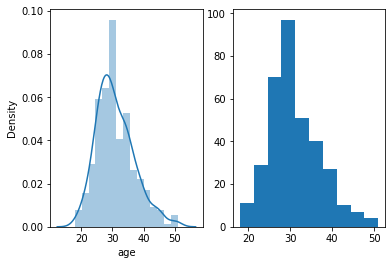

<IPython.core.display.Javascript object>

In [38]:
# Histogram
plt.subplot(1, 2, 1)
sns.distplot(df.age)

plt.subplot(1, 2, 2)
plt.hist(df.age)
plt.show()

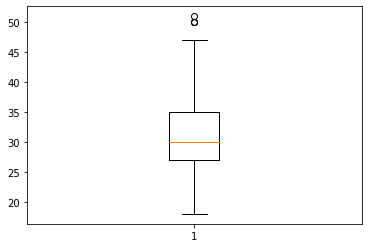

<IPython.core.display.Javascript object>

In [39]:
plt.boxplot(df.age)
plt.show()

In [40]:
Q1 = np.quantile(df.age, 0.25)
Q3 = np.quantile(df.age, 0.75)
IQR = Q3 - Q1

# số lượng outliers
num_outliers = len(df[(df.age > Q3 + 1.5 * IQR) | (df.age < Q1 - 1.5 * IQR)])

# tỉ lệ outliers so với mẫu
ratio = num_outliers / df.shape[0]

print("Số lượng outliers: ", num_outliers)
print("Tỉ lệ outliers so với mẫu", ratio)

Số lượng outliers:  4
Tỉ lệ outliers so với mẫu 0.011560693641618497


<IPython.core.display.Javascript object>

In [41]:
"""
Vì max của df.age = 51, đây là giá trị hợp lệ đối với đề tài này.
=> ko cần phải loại bỏ outliers
"""

'\nVì max của df.age = 51, đây là giá trị hợp lệ đối với đề tài này.\n=> ko cần phải loại bỏ outliers\n'

<IPython.core.display.Javascript object>

### Categorical Variables

In [42]:
def categorical_univariate_variable(f):
    print("1\ Mật độ phân phối: \n", f.value_counts())
    print("2\ Số giá trị NaN: \n", f.isnull().sum())
    print("\n\n3\ Tỉ lệ mật độ phân phối:\n", f.value_counts() / len(f))
    f.value_counts().plot.bar()
    plt.show()

<IPython.core.display.Javascript object>

#### education

1\ Mật độ phân phối: 
 High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 High School or Below    0.436416
college                 0.430636
Bechalor                0.127168
Master or Above         0.005780
Name: education, dtype: float64


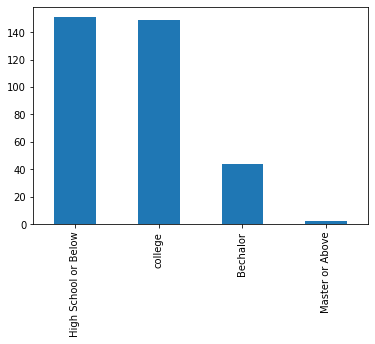

<IPython.core.display.Javascript object>

In [43]:
categorical_univariate_variable(df.education)

In [44]:
"""
education ko có giá trị null, có 4 giá trị duy nhất
"""

'\neducation ko có giá trị null, có 4 giá trị duy nhất\n'

<IPython.core.display.Javascript object>

#### Gender

1\ Mật độ phân phối: 
 male      294
female     52
Name: Gender, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 male      0.849711
female    0.150289
Name: Gender, dtype: float64


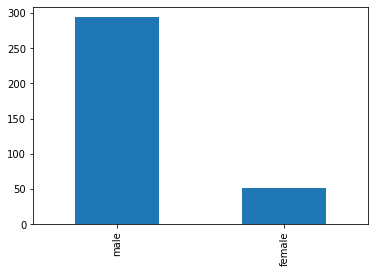

<IPython.core.display.Javascript object>

In [45]:
categorical_univariate_variable(df.Gender)

In [46]:
"""
gender ko có giá trị null, có 2 giá trị duy nhất
"""

'\ngender ko có giá trị null, có 2 giá trị duy nhất\n'

<IPython.core.display.Javascript object>

#### effective_date

1\ Mật độ phân phối: 
 9/11/2016    166
9/12/2016     87
9/10/2016     31
9/14/2016     31
9/13/2016     20
9/9/2016       8
9/8/2016       3
Name: effective_date, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 9/11/2016    0.479769
9/12/2016    0.251445
9/10/2016    0.089595
9/14/2016    0.089595
9/13/2016    0.057803
9/9/2016     0.023121
9/8/2016     0.008671
Name: effective_date, dtype: float64


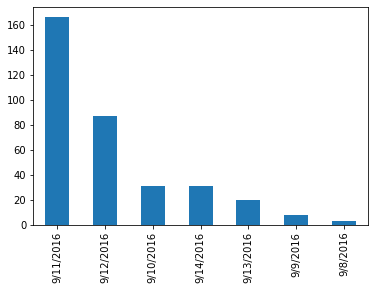

<IPython.core.display.Javascript object>

In [47]:
categorical_univariate_variable(df["effective_date"])

In [48]:
"""
effective_date ko có giá trị null, có 7 giá trị duy nhất
"""

'\neffective_date ko có giá trị null, có 7 giá trị duy nhất\n'

<IPython.core.display.Javascript object>

#### due_date

1\ Mật độ phân phối: 
 10/10/2016    90
9/25/2016     63
9/26/2016     42
10/11/2016    36
10/13/2016    19
10/9/2016     18
9/24/2016     12
9/27/2016     11
9/28/2016     10
11/9/2016      6
10/12/2016     6
10/8/2016      5
10/25/2016     4
11/10/2016     4
9/19/2016      3
9/23/2016      3
9/18/2016      3
9/16/2016      3
9/17/2016      2
11/12/2016     2
10/7/2016      2
10/26/2016     1
9/22/2016      1
Name: due_date, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 10/10/2016    0.260116
9/25/2016     0.182081
9/26/2016     0.121387
10/11/2016    0.104046
10/13/2016    0.054913
10/9/2016     0.052023
9/24/2016     0.034682
9/27/2016     0.031792
9/28/2016     0.028902
11/9/2016     0.017341
10/12/2016    0.017341
10/8/2016     0.014451
10/25/2016    0.011561
11/10/2016    0.011561
9/19/2016     0.008671
9/23/2016     0.008671
9/18/2016     0.008671
9/16/2016     0.008671
9/17/2016     0.005780
11/12/2016    0.005780
10/7/2016     0.005780
10/26/2016    0.00289

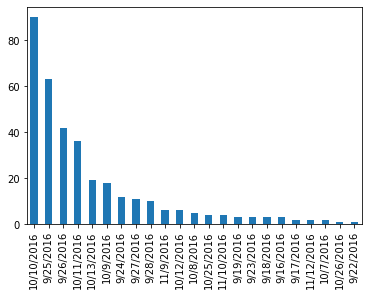

<IPython.core.display.Javascript object>

In [49]:
categorical_univariate_variable(df["due_date"])

In [50]:
"""
due_date ko có giá trị null
"""

'\ndue_date ko có giá trị null\n'

<IPython.core.display.Javascript object>

#### terms

1\ Mật độ phân phối: 
 30    184
15    148
7      14
Name: terms, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 30    0.531792
15    0.427746
7     0.040462
Name: terms, dtype: float64


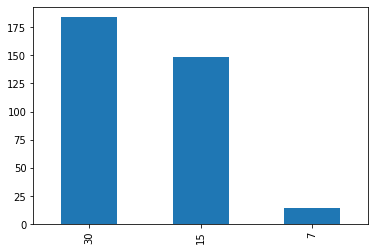

<IPython.core.display.Javascript object>

In [51]:
categorical_univariate_variable(df.terms)

In [52]:
"""
terms ko có giá trị null, có 3 giá trị duy nhất
"""

'\nterms ko có giá trị null, có 3 giá trị duy nhất\n'

<IPython.core.display.Javascript object>

#### Principal

1\ Mật độ phân phối: 
 1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 1000    0.745665
800     0.234104
300     0.008671
900     0.005780
500     0.005780
Name: Principal, dtype: float64


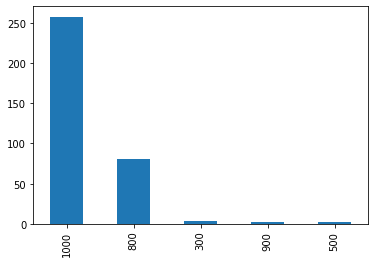

<IPython.core.display.Javascript object>

In [53]:
categorical_univariate_variable(df.Principal)

In [54]:
"""
Principal có 5 giá trị duy nhất, ko có NaN
"""

'\nPrincipal có 5 giá trị duy nhất, ko có NaN\n'

<IPython.core.display.Javascript object>

#### loan_status (target)

1\ Mật độ phân phối: 
 PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64
2\ Số giá trị NaN: 
 0


3\ Tỉ lệ mật độ phân phối:
 PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64


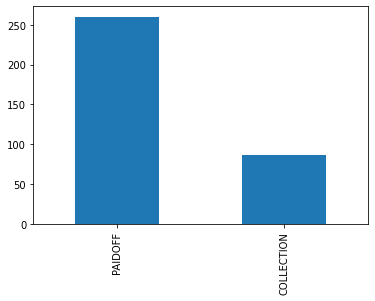

<IPython.core.display.Javascript object>

In [55]:
categorical_univariate_variable(df["loan_status"])

In [56]:
"""
loan_status ko có giá trị null
"""

'\nloan_status ko có giá trị null\n'

<IPython.core.display.Javascript object>

### Bi-variate Analysis

#### Continuous & Continuous

In [57]:
"""
Vì chỉ có 1 biến continuous nên ko Bi-variate Analysis
"""

'\nVì chỉ có 1 biến continuous nên ko Bi-variate Analysis\n'

<IPython.core.display.Javascript object>

#### Categorical & Categorical

In [58]:
def cate_cate(dataset, f1, f2):
    table = pd.crosstab(f1, f2)
    
    plt.rcParams["figure.figsize"] = [10, 5]
    table.plot.bar(stacked = True)
    plt.show()
    
    stat, p_value, dof, expected = chi2_contingency(table)
    print('Statistic: ', stat)
    print('p-value: ', p_value)
    print('Dof: ', dof)
    
    proba = 0.95
    alpha = 1 - proba 
    critical = chi2.ppf(proba, dof)
    print('critical: ', critical)
    
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to H0)')



<IPython.core.display.Javascript object>

loan_status & Gender


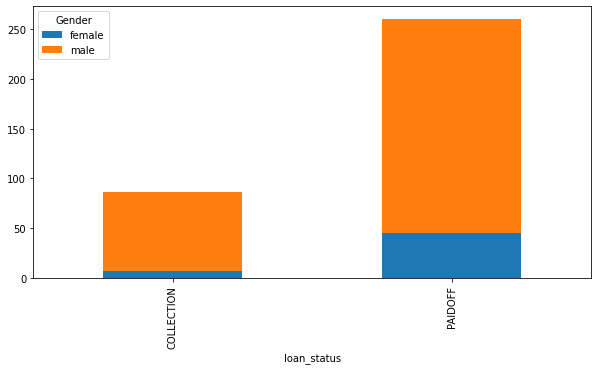

Statistic:  3.5660068310384565
p-value:  0.058973966651795835
Dof:  1
critical:  3.841458820694124
Independent (fail to H0)


--------------------------------------------
loan_status & effective_date


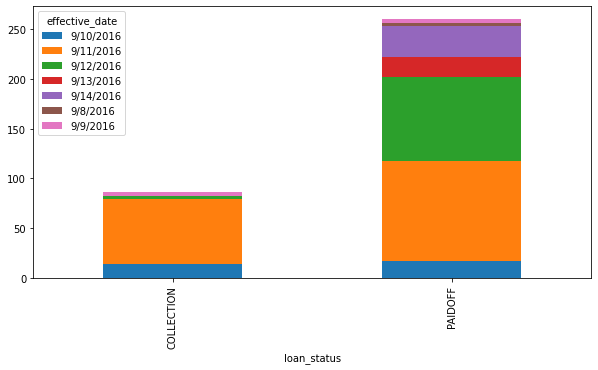

Statistic:  66.93662936163238
p-value:  1.734087917975161e-12
Dof:  6
critical:  12.591587243743977
Dependent (reject H0)


--------------------------------------------
loan_status & due_date


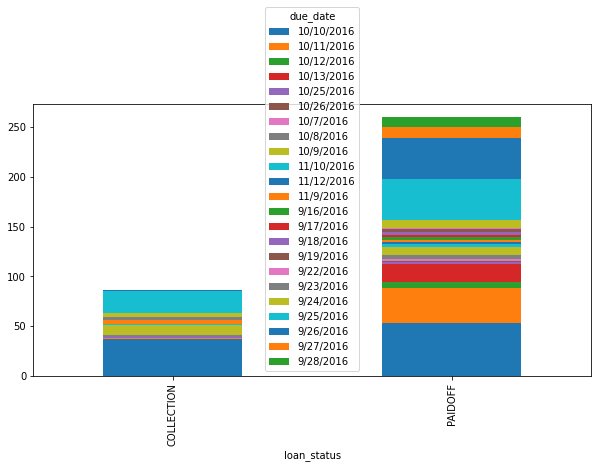

Statistic:  83.3893207825766
p-value:  4.450260702797503e-09
Dof:  22
critical:  33.92443847144381
Dependent (reject H0)


--------------------------------------------
loan_status & Principal


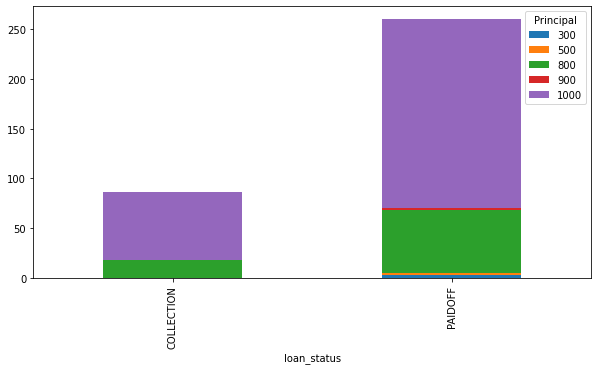

Statistic:  2.9273564366046787
p-value:  0.5700548045851189
Dof:  4
critical:  9.487729036781154
Independent (fail to H0)


--------------------------------------------
loan_status & terms


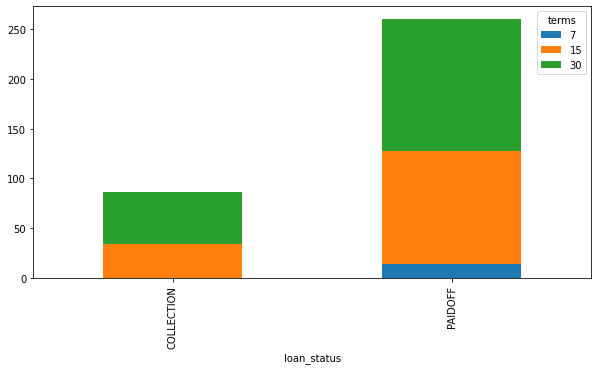

Statistic:  6.054012642182509
p-value:  0.048460496354213234
Dof:  2
critical:  5.991464547107979
Dependent (reject H0)


--------------------------------------------
loan_status & education


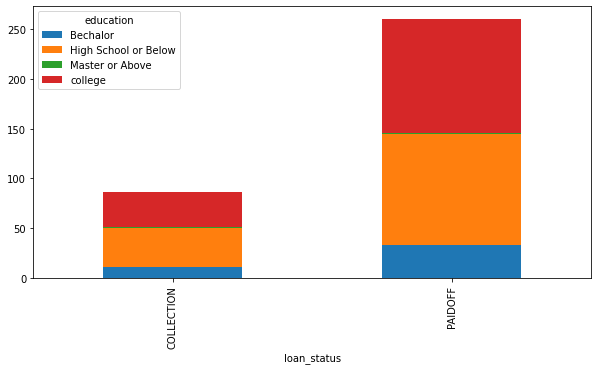

Statistic:  0.902697450437272
p-value:  0.8247768037862694
Dof:  3
critical:  7.814727903251179
Independent (fail to H0)


--------------------------------------------
Gender & effective_date


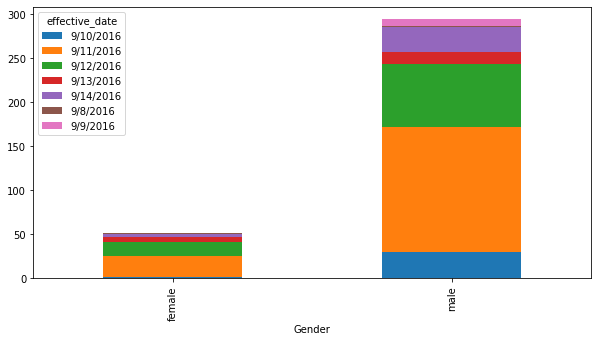

Statistic:  9.2268814985575
p-value:  0.1612147197312493
Dof:  6
critical:  12.591587243743977
Independent (fail to H0)


--------------------------------------------
Gender & due_date


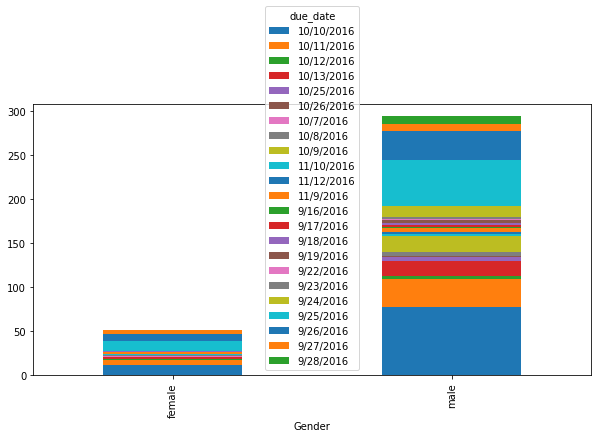

Statistic:  20.664727516983163
p-value:  0.5415328954028338
Dof:  22
critical:  33.92443847144381
Independent (fail to H0)


--------------------------------------------
Gender & Principal


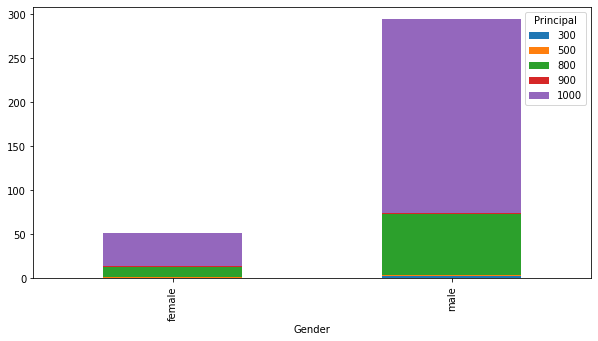

Statistic:  4.382445842578732
p-value:  0.35671479250105864
Dof:  4
critical:  9.487729036781154
Independent (fail to H0)


--------------------------------------------
Gender & terms


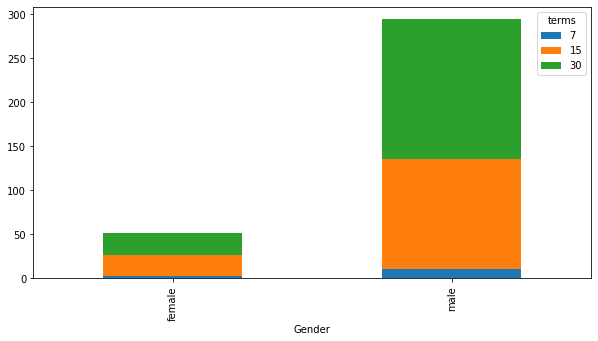

Statistic:  0.5956482494858713
p-value:  0.7424319036678668
Dof:  2
critical:  5.991464547107979
Independent (fail to H0)


--------------------------------------------
Gender & education


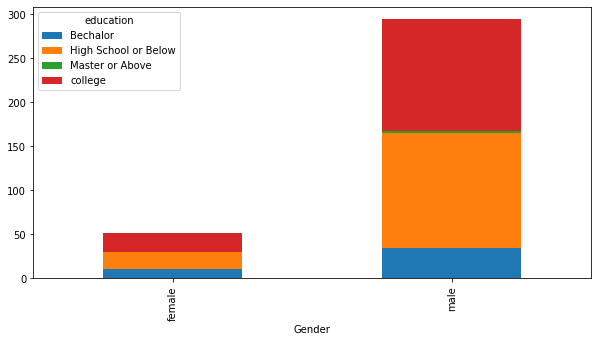

Statistic:  2.7801170350077298
p-value:  0.4267834746415903
Dof:  3
critical:  7.814727903251179
Independent (fail to H0)


--------------------------------------------
effective_date & Gender


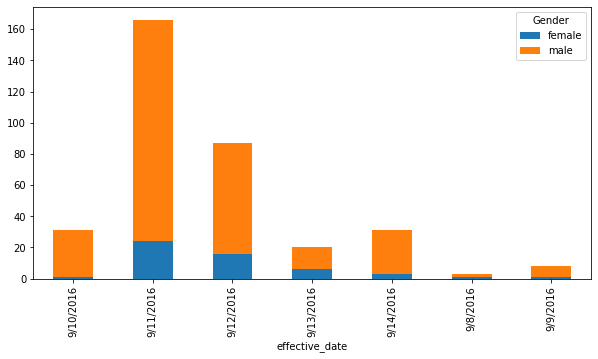

Statistic:  9.2268814985575
p-value:  0.1612147197312493
Dof:  6
critical:  12.591587243743977
Independent (fail to H0)


--------------------------------------------
effective_date & due_date


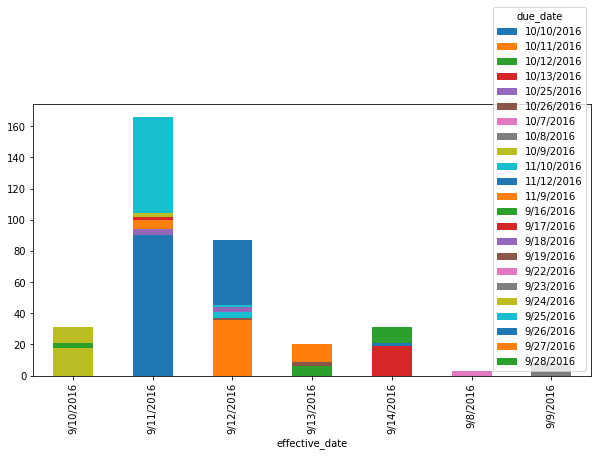

Statistic:  2047.9588169227932
p-value:  0.0
Dof:  132
critical:  159.8135468509978
Dependent (reject H0)


--------------------------------------------
effective_date & Principal


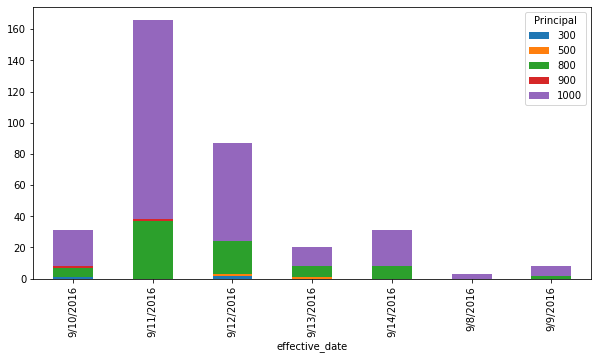

Statistic:  22.574161067271387
p-value:  0.5450378440350745
Dof:  24
critical:  36.41502850180731
Independent (fail to H0)


--------------------------------------------
effective_date & terms


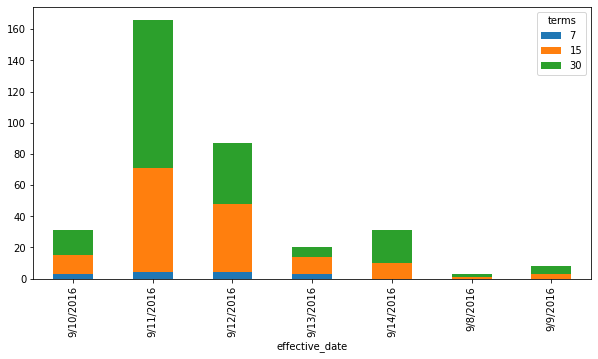

Statistic:  19.579436041757866
p-value:  0.07547169726032107
Dof:  12
critical:  21.02606981748307
Independent (fail to H0)


--------------------------------------------
effective_date & education


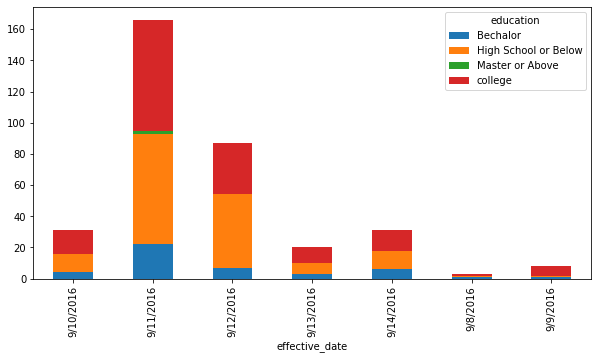

Statistic:  13.507460240747145
p-value:  0.7605886090578154
Dof:  18
critical:  28.869299430392623
Independent (fail to H0)


--------------------------------------------
due_date & Gender


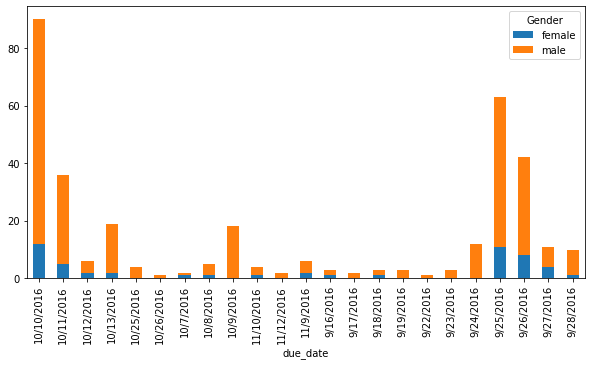

Statistic:  20.66472751698316
p-value:  0.5415328954028341
Dof:  22
critical:  33.92443847144381
Independent (fail to H0)


--------------------------------------------
due_date & effective_date


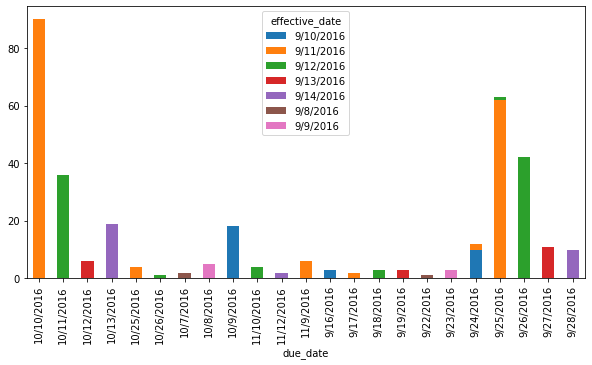

Statistic:  2047.9588169227932
p-value:  0.0
Dof:  132
critical:  159.8135468509978
Dependent (reject H0)


--------------------------------------------
due_date & Principal


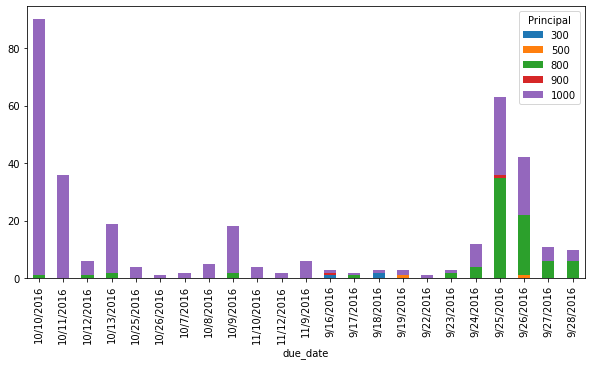

Statistic:  431.15637785944693
p-value:  1.085035313344234e-46
Dof:  88
critical:  110.89800282268448
Dependent (reject H0)


--------------------------------------------
due_date & terms


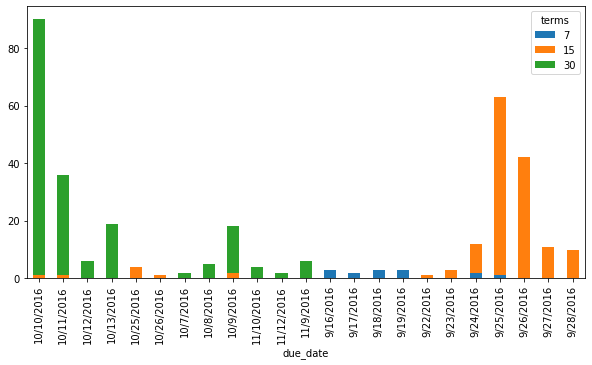

Statistic:  604.5187500166537
p-value:  1.3842392765376201e-99
Dof:  44
critical:  60.480886582336446
Dependent (reject H0)


--------------------------------------------
due_date & education


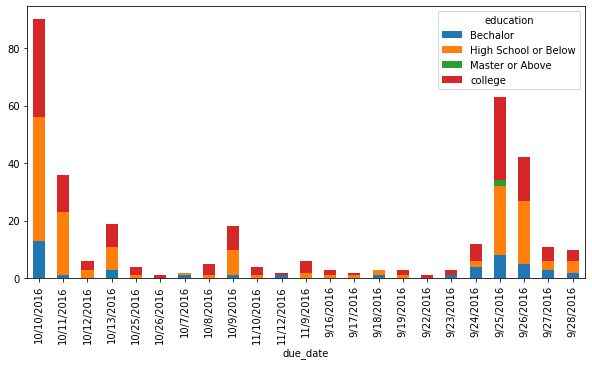

Statistic:  53.00035778251724
p-value:  0.8762804195900535
Dof:  66
critical:  85.96490744123096
Independent (fail to H0)


--------------------------------------------
Principal & Gender


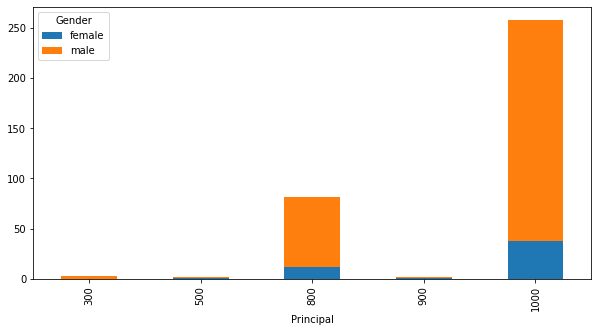

Statistic:  4.382445842578732
p-value:  0.35671479250105864
Dof:  4
critical:  9.487729036781154
Independent (fail to H0)


--------------------------------------------
Principal & effective_date


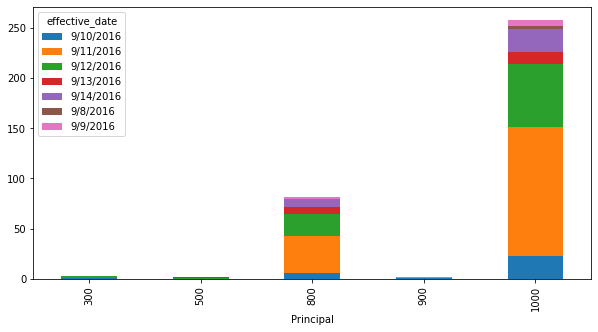

Statistic:  22.574161067271387
p-value:  0.5450378440350745
Dof:  24
critical:  36.41502850180731
Independent (fail to H0)


--------------------------------------------
Principal & due_date


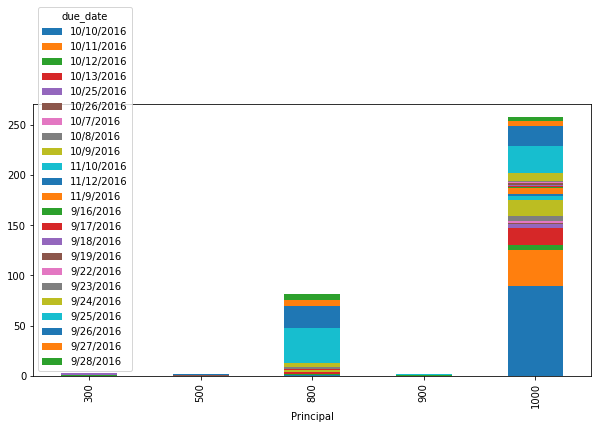

Statistic:  431.15637785944693
p-value:  1.085035313344234e-46
Dof:  88
critical:  110.89800282268448
Dependent (reject H0)


--------------------------------------------
Principal & terms


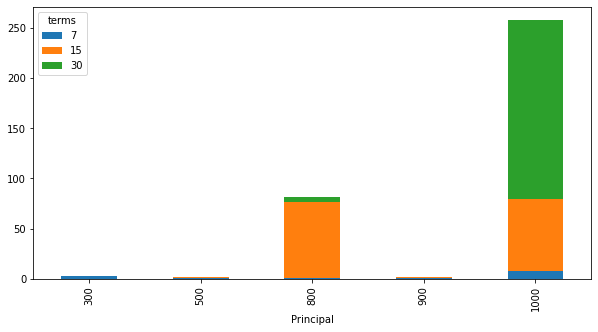

Statistic:  203.7705034046035
p-value:  1.0252490708763963e-39
Dof:  8
critical:  15.50731305586545
Dependent (reject H0)


--------------------------------------------
Principal & education


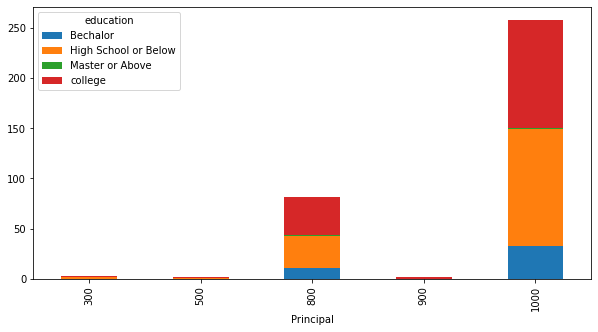

Statistic:  5.230535116008667
p-value:  0.9498321651463227
Dof:  12
critical:  21.02606981748307
Independent (fail to H0)


--------------------------------------------
terms & Gender


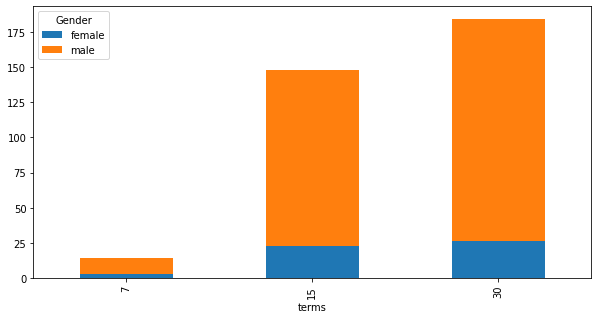

Statistic:  0.5956482494858714
p-value:  0.7424319036678667
Dof:  2
critical:  5.991464547107979
Independent (fail to H0)


--------------------------------------------
terms & effective_date


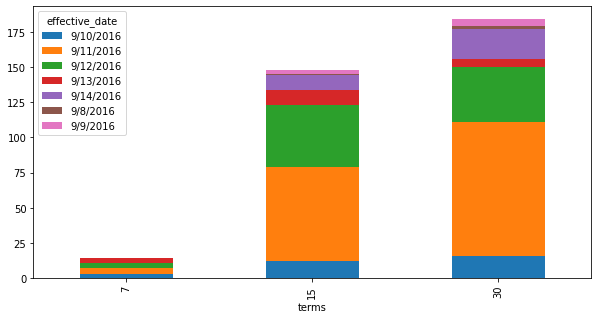

Statistic:  19.579436041757866
p-value:  0.07547169726032107
Dof:  12
critical:  21.02606981748307
Independent (fail to H0)


--------------------------------------------
terms & due_date


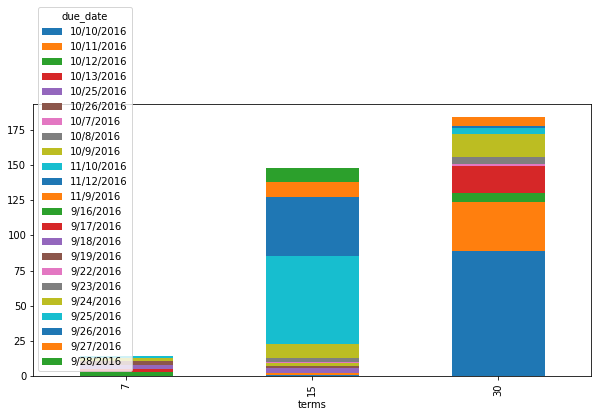

Statistic:  604.5187500166537
p-value:  1.3842392765376201e-99
Dof:  44
critical:  60.480886582336446
Dependent (reject H0)


--------------------------------------------
terms & Principal


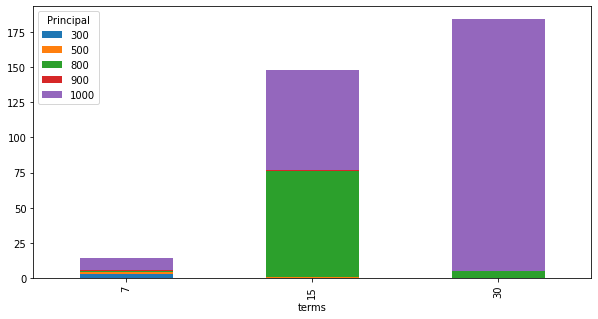

Statistic:  203.7705034046035
p-value:  1.0252490708763963e-39
Dof:  8
critical:  15.50731305586545
Dependent (reject H0)


--------------------------------------------
terms & education


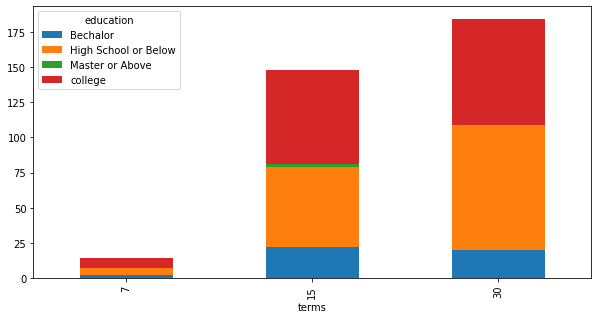

Statistic:  6.31970921237594
p-value:  0.38834512157192347
Dof:  6
critical:  12.591587243743977
Independent (fail to H0)


--------------------------------------------


<IPython.core.display.Javascript object>

In [59]:
lst_cat = [
    "loan_status",
    "Gender",
    "effective_date",
    "due_date",
    "Principal",
    "terms",
    "education",
]

for i in range(len(lst_cat) - 1):
    for j in range(1, len(lst_cat)):
        if df[lst_cat[i]] is not df[lst_cat[j]]:
            print(lst_cat[i], "&", lst_cat[j])
            cate_cate(df, df[lst_cat[i]], df[lst_cat[j]])
            print("\n")
            print("--------------------------------------------")
        else:
            pass


#### Categorical & Continuous

In [60]:
def cate_con(dataset, f1, f2, f3):
    plt.figure(figsize = (12, 8))
    sns.boxplot(data = dataset, x = dataset[f1], y = dataset[f2], hue = dataset[f3])
    plt.show()
    
    model = ols(f1+"~ C("+f2+')'+'+C('+f3+')' + "+ C("+f2+')'+':C('+f3+')' , data=dataset).fit()
    print(sm.stats.anova_lm(model, typ=2))


<IPython.core.display.Javascript object>

loan_status & Gender


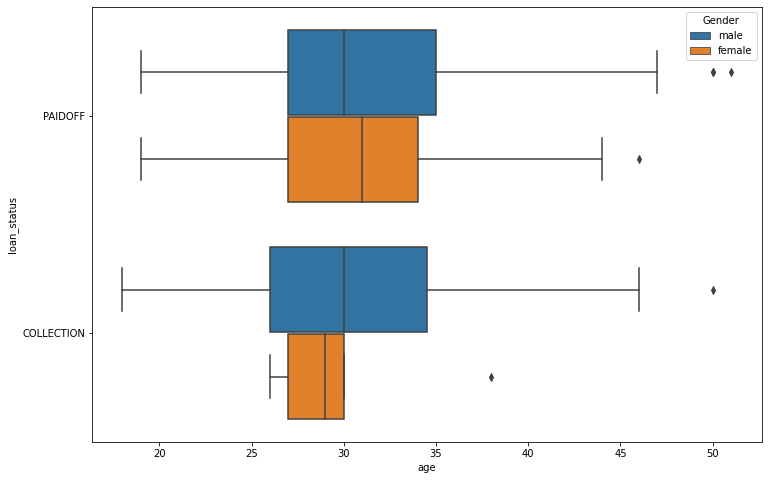

                                sum_sq     df         F    PR(>F)
C(loan_status)               10.454369    1.0  0.284548  0.594082
C(Gender)                     2.344773    1.0  0.063820  0.800708
C(loan_status):C(Gender)      6.714916    1.0  0.182767  0.669275
Residual                  12565.163656  342.0       NaN       NaN


--------------------------------------------
loan_status & effective_date


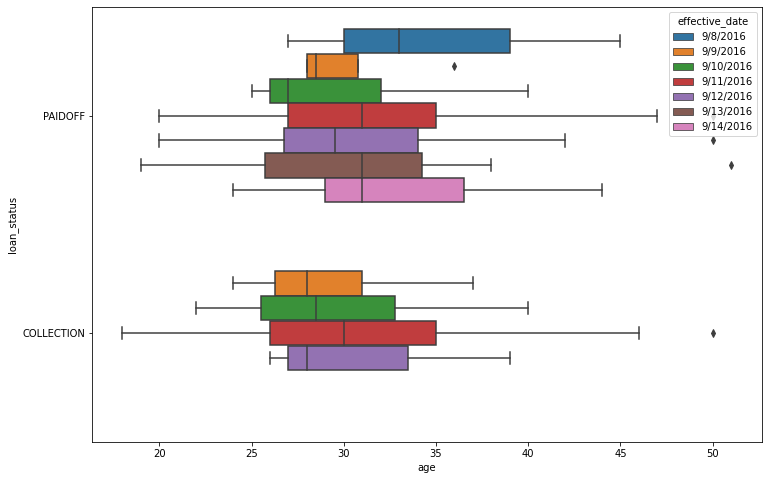

                                        sum_sq     df         F    PR(>F)
C(loan_status)                       28.891740    1.0  0.786601  0.375766
C(effective_date)                   181.778328    6.0  0.824844  0.480900
C(loan_status):C(effective_date)    178.835034    6.0  0.811488  0.561546
Residual                          12304.499448  335.0       NaN       NaN


--------------------------------------------
loan_status & due_date


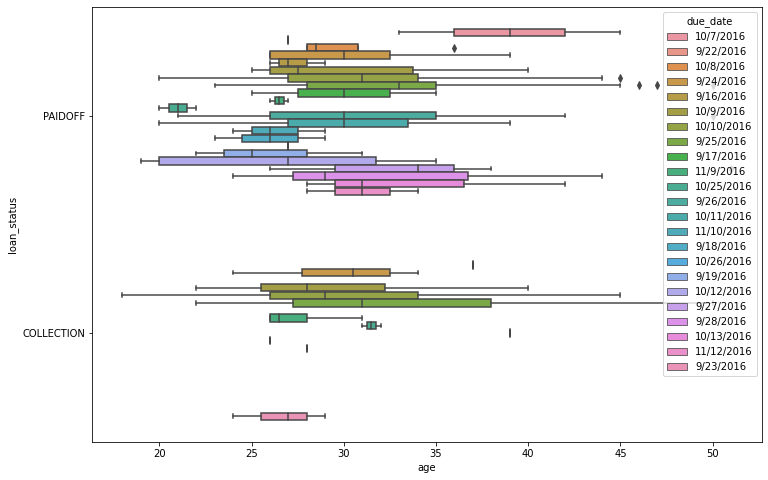

                                  sum_sq     df         F    PR(>F)
C(loan_status)                 62.065524    1.0  1.765630  0.184892
C(due_date)                  1383.294969   22.0  1.788716  0.061810
C(loan_status):C(due_date)    987.756361   22.0  1.277251  0.187815
Residual                    11002.594561  313.0       NaN       NaN


--------------------------------------------
loan_status & Principal


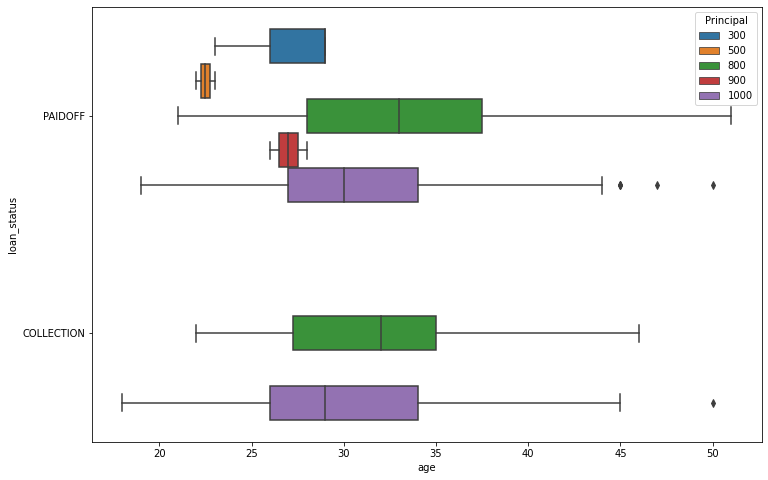

                                   sum_sq     df           F        PR(>F)
C(loan_status)                  42.791804    1.0    1.210994  2.719162e-01
C(Principal)                 18639.921093    4.0  131.875871  8.601892e-68
C(loan_status):C(Principal)    156.906593    4.0    1.110101  3.515874e-01
Residual                     11978.941250  339.0         NaN           NaN


--------------------------------------------
loan_status & terms


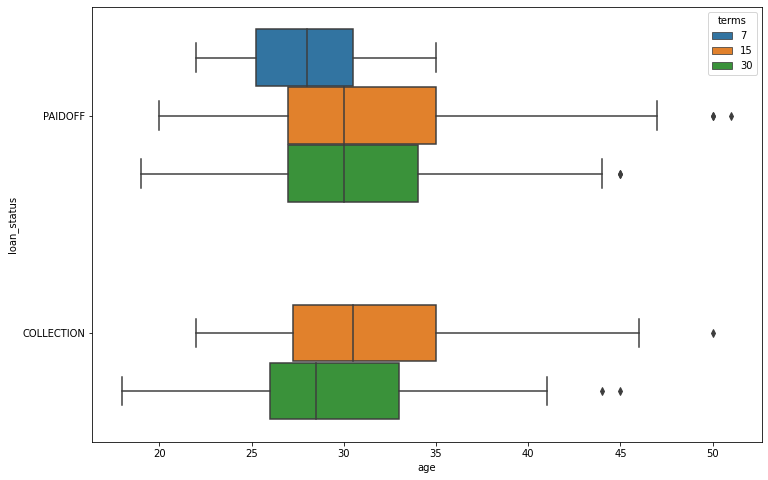

                               sum_sq     df           F        PR(>F)
C(loan_status)             173.291813    1.0    4.821139  2.878594e-02
C(terms)                 17928.068640    2.0  249.387772  1.839891e-67
C(loan_status):C(terms)    581.702352    2.0    8.091750  3.686717e-04
Residual                 12256.959025  341.0         NaN           NaN


--------------------------------------------
education & Gender


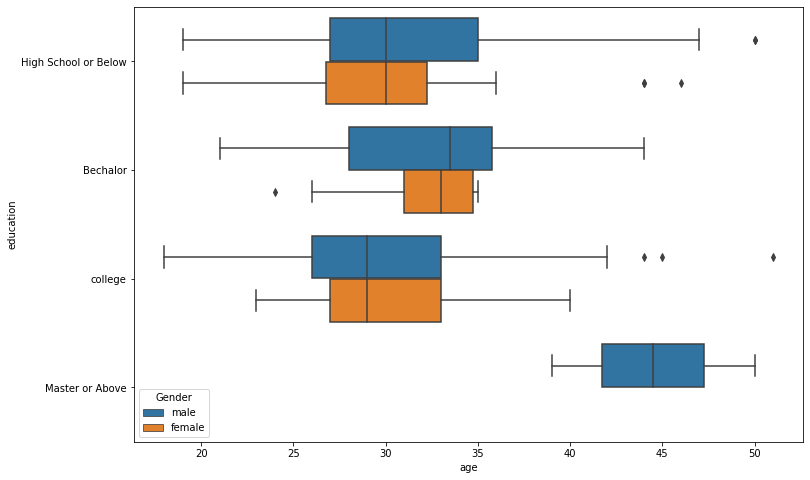

                              sum_sq     df         F    PR(>F)
C(education)              381.464465    3.0  3.585822  0.028770
C(Gender)                   2.984782    1.0  0.084172  0.771898
C(education):C(Gender)    306.933369    3.0  2.885218  0.035758
Residual                12021.089928  339.0       NaN       NaN


--------------------------------------------
education & effective_date


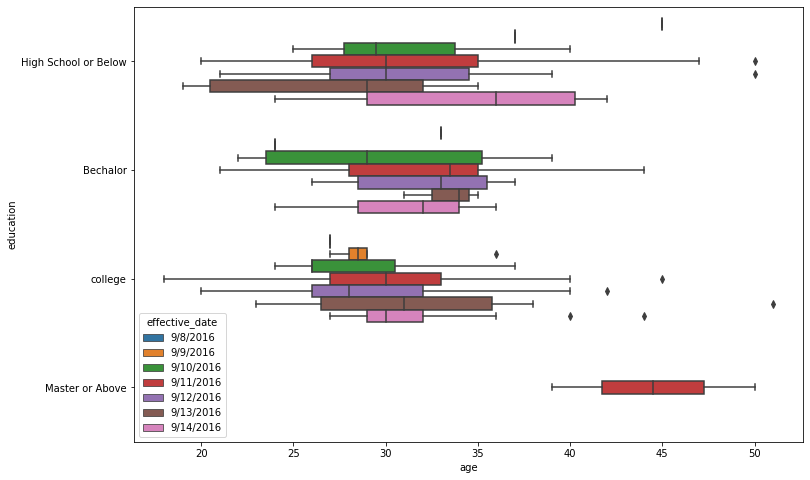

                                      sum_sq     df         F    PR(>F)
C(education)                      256.332645    3.0  2.460696  0.086970
C(effective_date)                 177.450485    6.0  0.851729  0.466486
C(education):C(effective_date)   1163.481154   18.0  1.861497  0.033700
Residual                        11250.443249  324.0       NaN       NaN


--------------------------------------------
education & due_date


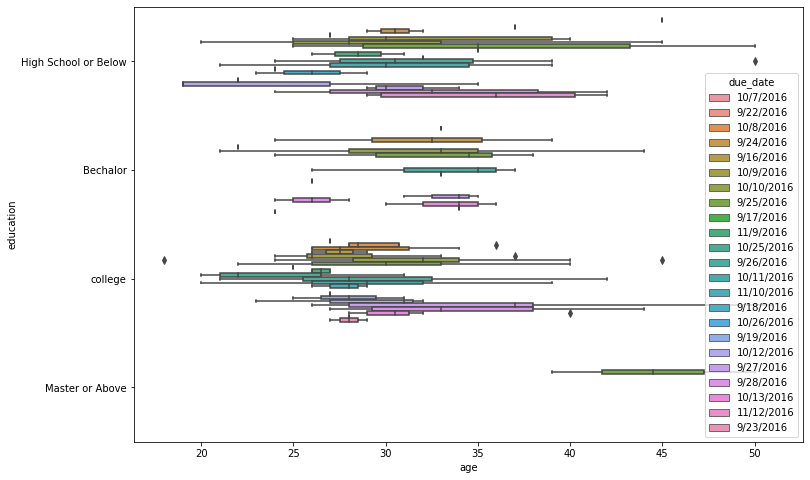

                               sum_sq     df         F    PR(>F)
C(education)                 0.260892    3.0  0.002651  0.997352
C(due_date)                884.126076   22.0  1.225263  0.300708
C(education):C(due_date)  3030.195397   66.0  1.399795  0.065053
Residual                  9577.344232  292.0       NaN       NaN


--------------------------------------------
education & Principal


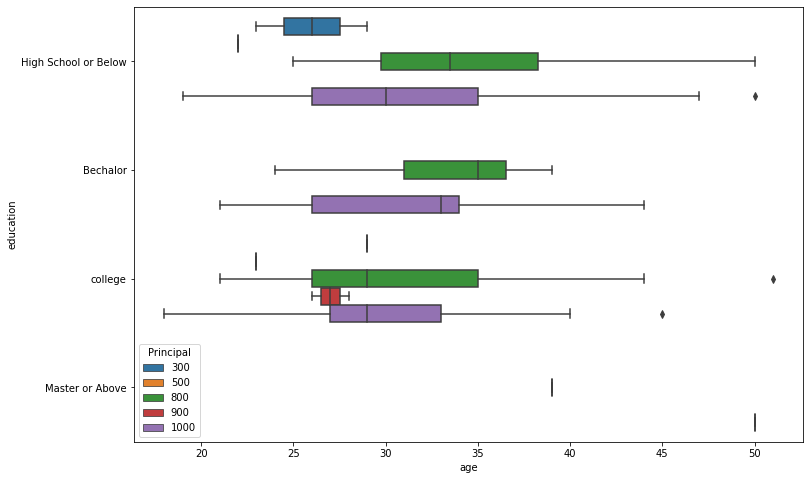

                                 sum_sq     df          F        PR(>F)
C(education)                 422.356050    3.0   4.164901  4.205804e-02
C(Principal)                2349.027881    4.0  17.373024  6.656112e-08
C(education):C(Principal)   1018.811842   12.0   2.511655  8.571415e-03
Residual                   11256.334760  333.0        NaN           NaN


--------------------------------------------
education & terms


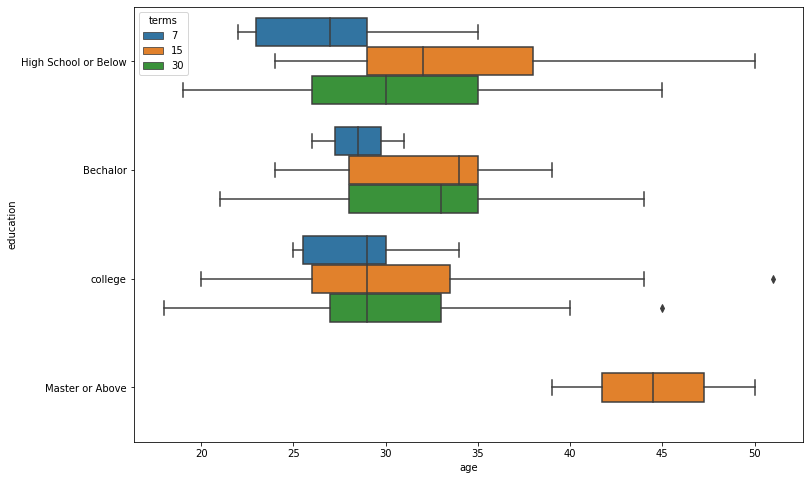

                             sum_sq     df         F    PR(>F)
C(education)             373.189350    3.0  3.630080  0.027559
C(terms)                 176.799126    2.0  2.579635  0.109186
C(education):C(terms)    634.666964    6.0  3.086760  0.009713
Residual               11514.129215  336.0       NaN       NaN


--------------------------------------------
Gender & effective_date


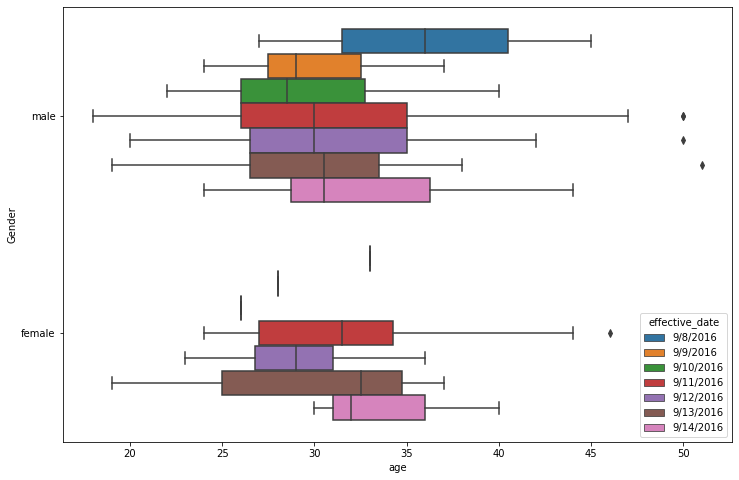

                                   sum_sq     df         F    PR(>F)
C(Gender)                        1.573193    1.0  0.042658  0.836497
C(effective_date)              267.345567    6.0  1.208203  0.301488
C(Gender):C(effective_date)     71.081354    6.0  0.321235  0.925722
Residual                     12243.906019  332.0       NaN       NaN


--------------------------------------------
Gender & due_date


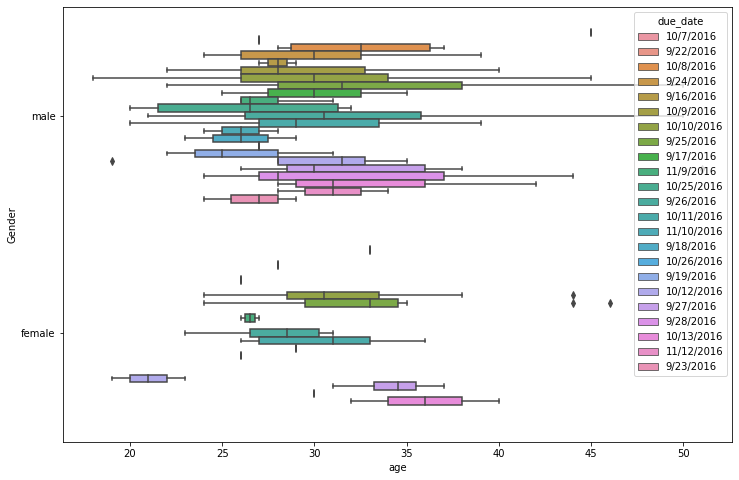

                             sum_sq     df         F    PR(>F)
C(Gender)                  4.586338    1.0  0.129669  0.719022
C(due_date)             1947.519423   22.0  2.502812  0.002868
C(Gender):C(due_date)    502.301913   22.0  0.645522  0.889367
Residual               10929.224096  309.0       NaN       NaN


--------------------------------------------
Gender & Principal


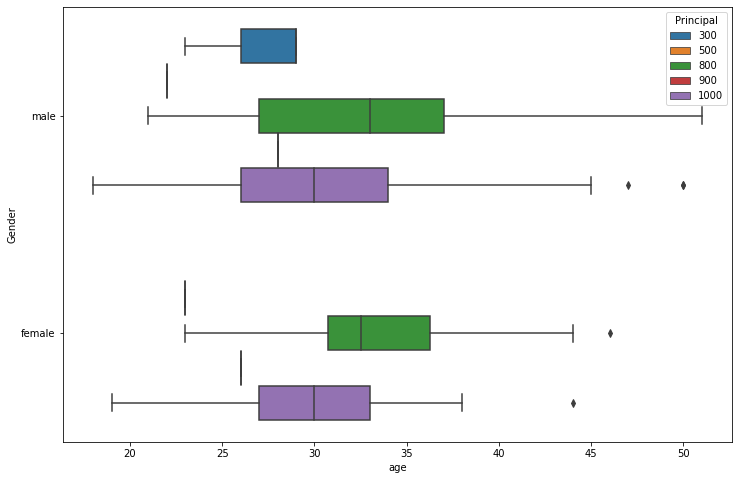

                              sum_sq     df          F        PR(>F)
C(Gender)                   1.727084    1.0   0.048556  8.257279e-01
C(Principal)            12193.564987    4.0  85.704584  3.817609e-50
C(Gender):C(Principal)     67.711701    4.0   0.475923  7.534177e-01
Residual                11986.615006  337.0        NaN           NaN


--------------------------------------------
Gender & terms


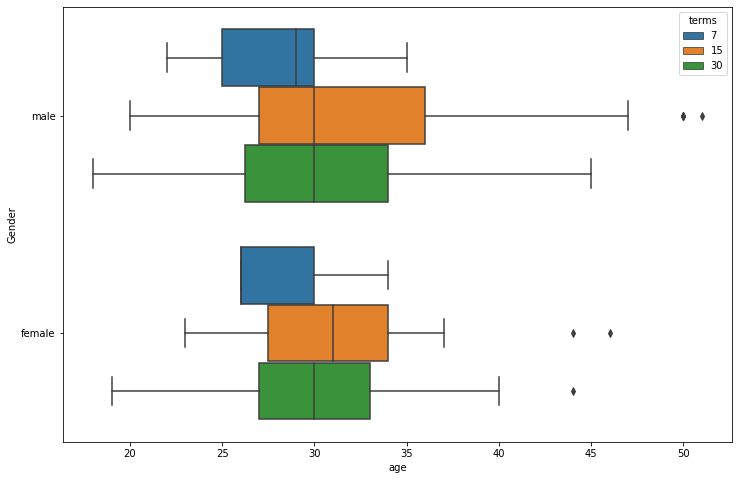

                          sum_sq     df         F    PR(>F)
C(Gender)               1.031157    1.0  0.028535  0.865957
C(terms)              291.552847    2.0  4.034078  0.018556
C(Gender):C(terms)      4.457602    2.0  0.061678  0.940196
Residual            12286.322492  340.0       NaN       NaN


--------------------------------------------
effective_date & Gender


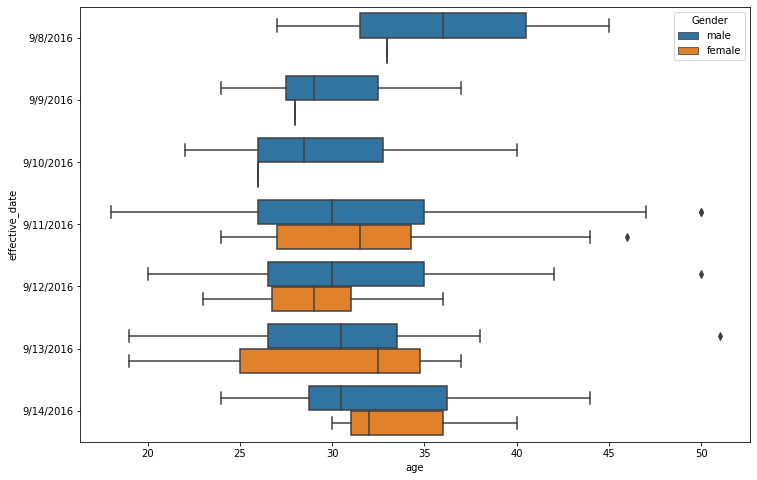

                                   sum_sq     df         F    PR(>F)
C(effective_date)              267.345567    6.0  1.208203  0.301488
C(Gender)                        1.573193    1.0  0.042658  0.836497
C(effective_date):C(Gender)     71.081354    6.0  0.321235  0.925722
Residual                     12243.906019  332.0       NaN       NaN


--------------------------------------------
effective_date & due_date


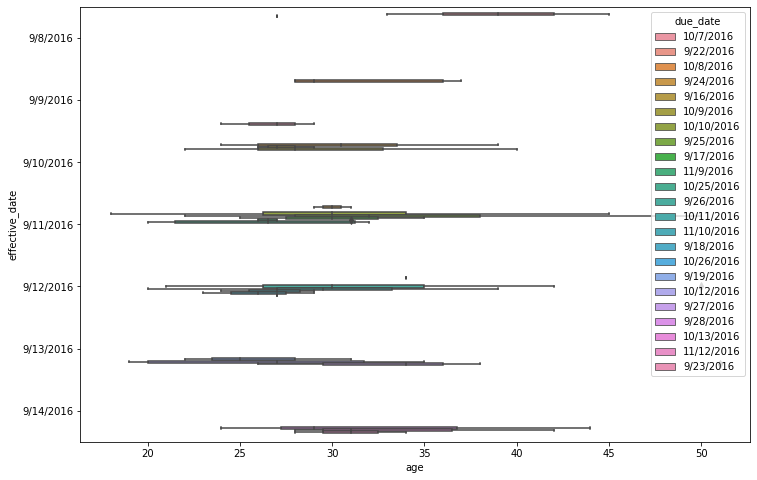

                                      sum_sq     df           F        PR(>F)
C(effective_date)                        NaN    6.0         NaN           NaN
C(due_date)                    286179.247970   22.0  371.120550  3.308726e-84
C(effective_date):C(due_date)   20676.060652  132.0    4.468826  1.306038e-09
Residual                        11251.372060  321.0         NaN           NaN


--------------------------------------------
effective_date & Principal


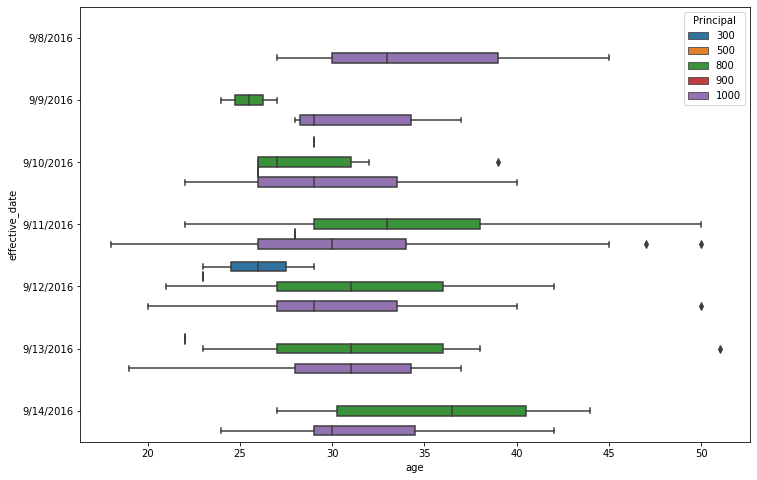

                                      sum_sq     df             F    PR(>F)
C(effective_date)               3.229533e-10    6.0  1.525519e-12  1.000000
C(Principal)                    4.568896e+02    4.0  3.237282e+00  0.040533
C(effective_date):C(Principal)  7.632621e+02   24.0  9.013466e-01  0.557674
Residual                        1.153768e+04  327.0           NaN       NaN


--------------------------------------------
effective_date & terms


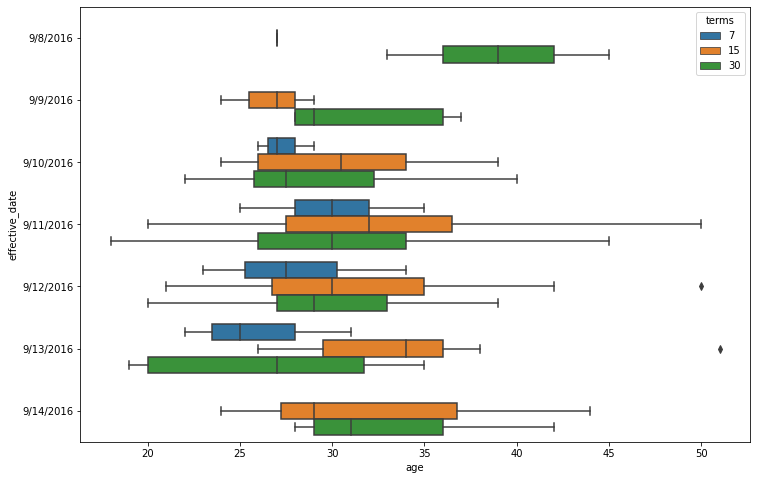

                                  sum_sq     df         F    PR(>F)
C(effective_date)             122.354517    6.0  0.577558  0.679106
C(terms)                      308.994641    2.0  4.375704  0.013322
C(effective_date):C(terms)    629.214455   12.0  1.485061  0.127860
Residual                    11581.022041  328.0       NaN       NaN


--------------------------------------------
due_date & Gender


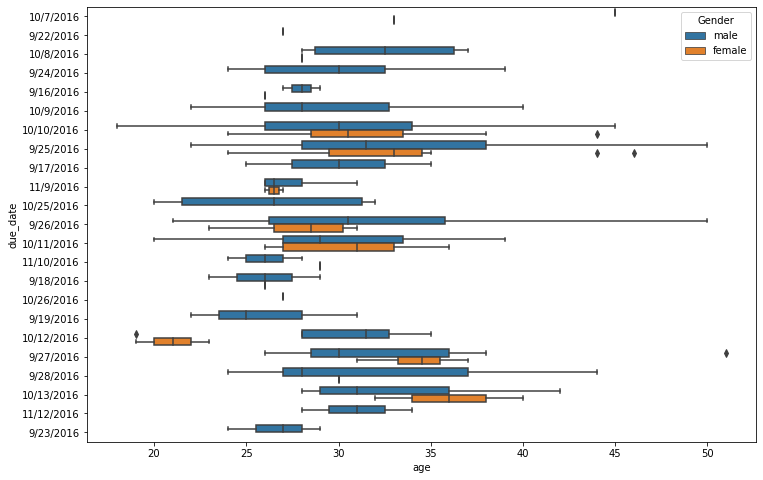

                             sum_sq     df         F    PR(>F)
C(due_date)             1947.519423   22.0  2.502812  0.002868
C(Gender)                  4.586338    1.0  0.129669  0.719022
C(due_date):C(Gender)    502.301913   22.0  0.645522  0.889367
Residual               10929.224096  309.0       NaN       NaN


--------------------------------------------
due_date & effective_date


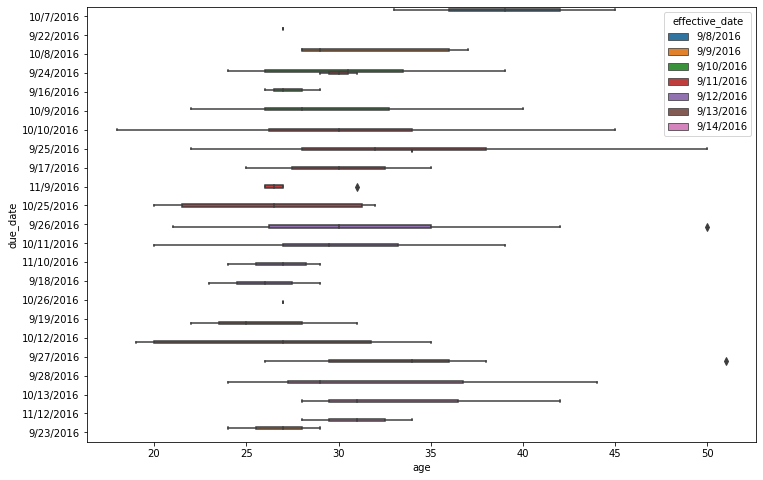

                                     sum_sq     df          F        PR(>F)
C(due_date)                     9361.086430   22.0  12.139565  5.621966e-04
C(effective_date)                       NaN    6.0        NaN           NaN
C(due_date):C(effective_date)  20676.060652  132.0   4.468826  1.306038e-09
Residual                       11251.372060  321.0        NaN           NaN


--------------------------------------------
due_date & Principal


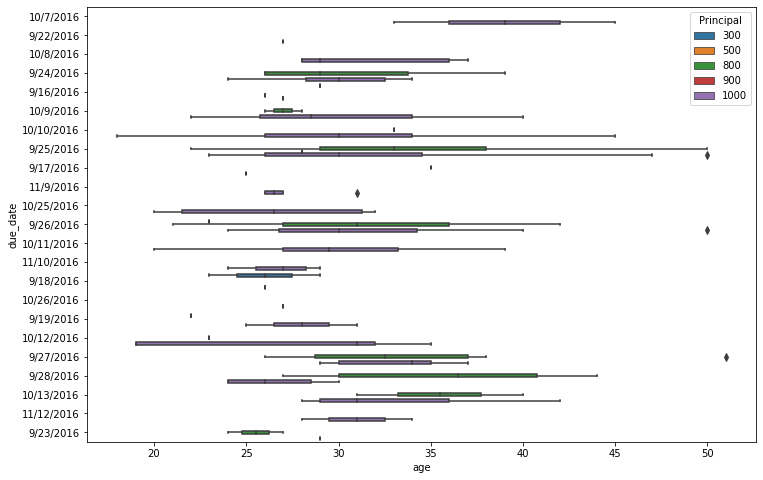

                                sum_sq     df             F    PR(>F)
C(due_date)                   0.000014   22.0  1.844065e-08  1.000000
C(Principal)                650.944983    4.0  4.635542e+00  0.001201
C(due_date):C(Principal)   3288.297805   88.0  1.064400e+00  0.375402
Residual                  10742.496370  306.0           NaN       NaN


--------------------------------------------
due_date & terms


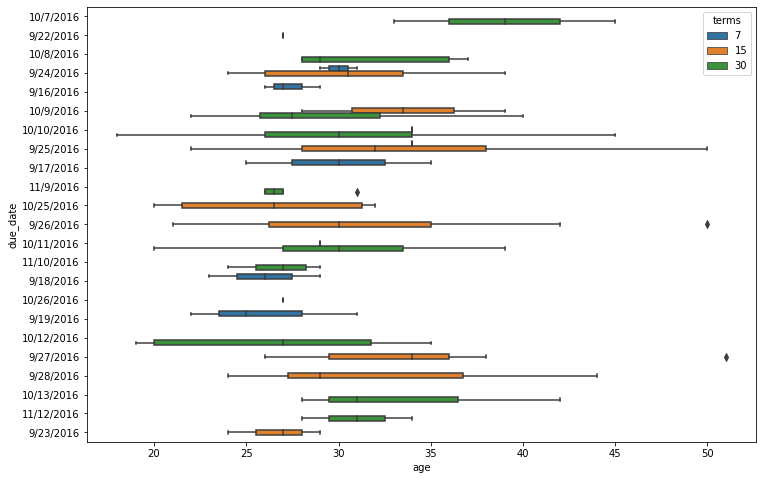

                            sum_sq     df         F    PR(>F)
C(due_date)            3718.326314   22.0  4.795517  0.000306
C(terms)                       NaN    2.0       NaN       NaN
C(due_date):C(terms)   2100.462771   44.0  1.354481  0.143209
Residual              11207.699410  318.0       NaN       NaN


--------------------------------------------
Principal & Gender


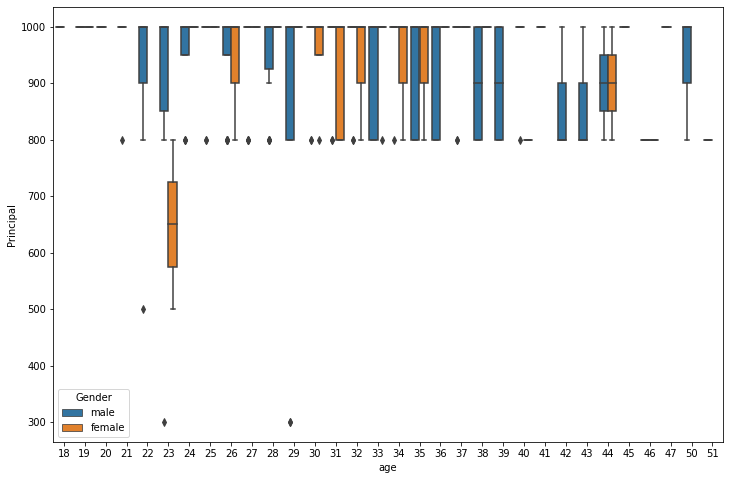

                              sum_sq     df          F        PR(>F)
C(Principal)            12193.564987    4.0  85.704584  3.817609e-50
C(Gender)                   1.727084    1.0   0.048556  8.257279e-01
C(Principal):C(Gender)     67.711701    4.0   0.475923  7.534177e-01
Residual                11986.615006  337.0        NaN           NaN


--------------------------------------------
Principal & effective_date


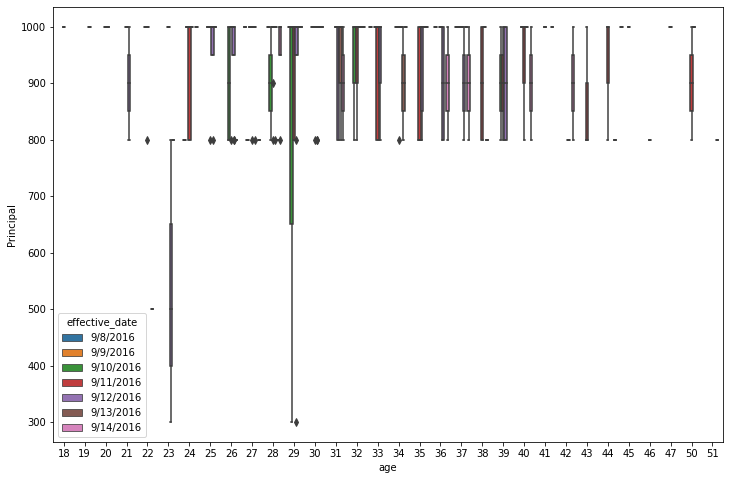

                                      sum_sq     df             F    PR(>F)
C(Principal)                    1.180560e+03    4.0  8.364832e+00  0.004082
C(effective_date)               5.498902e-10    6.0  2.597491e-12  1.000000
C(Principal):C(effective_date)  7.632621e+02   24.0  9.013466e-01  0.557674
Residual                        1.153768e+04  327.0           NaN       NaN


--------------------------------------------
Principal & due_date


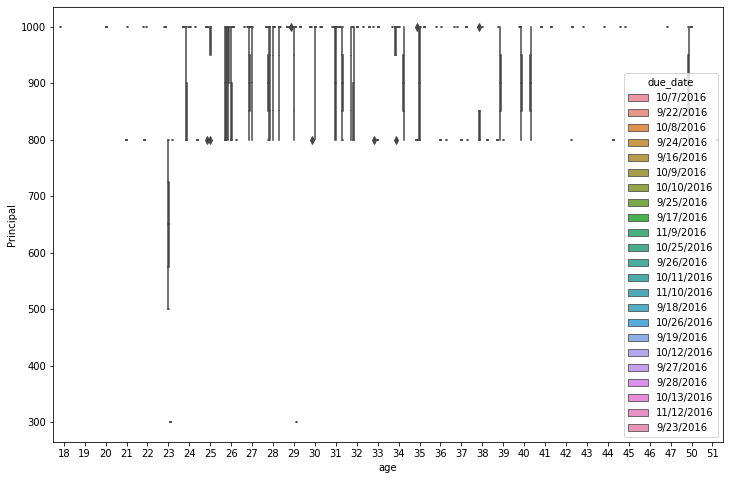

                                sum_sq     df             F    PR(>F)
C(Principal)             -1.205235e-08    4.0 -8.582776e-11  1.000000
C(due_date)               4.053181e-04   22.0  5.247948e-07  1.000000
C(Principal):C(due_date)  3.288298e+03   88.0  1.064400e+00  0.375402
Residual                  1.074250e+04  306.0           NaN       NaN


--------------------------------------------
Principal & terms


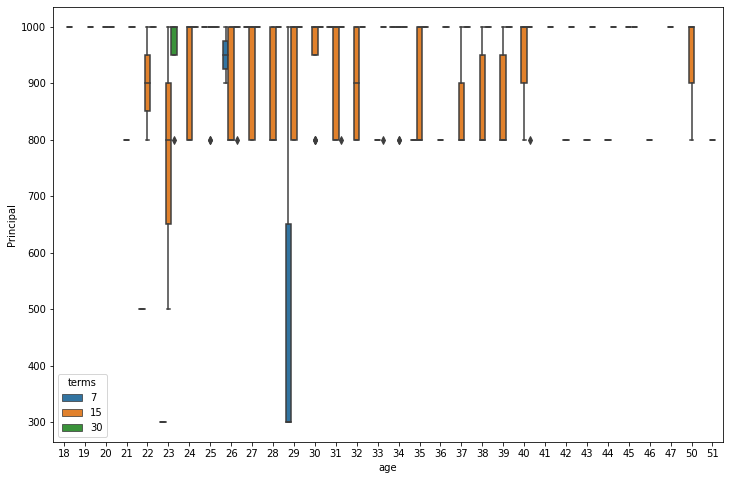

                             sum_sq     df             F    PR(>F)
C(Principal)           6.608480e+02    4.0  4.639405e+00  0.010293
C(terms)              -8.497163e-13    2.0 -1.193066e-14  1.000000
C(Principal):C(terms)  9.869860e+01    8.0  3.464509e-01  0.911753
Residual               1.192955e+04  335.0           NaN       NaN


--------------------------------------------


<IPython.core.display.Javascript object>

In [61]:
lst_cat = [
    "loan_status",
    "education",
    "Gender",
    "effective_date",
    "due_date",
    "Principal",
    "terms",
]


for i in range(len(lst_cat) - 1):
    for j in range(2, len(lst_cat)):
        if lst_cat[i] is not lst_cat[j]:
            print(lst_cat[i], "&", lst_cat[j])
            cate_con(df, "age", lst_cat[i], lst_cat[j])
            print("\n")
            print("--------------------------------------------")
        else:
            pass


# cate_con(df, "age", "loan_status", "education")
# cate_con(df, "age", "loan_status", "Gender")
# cate_con(df, "age", "loan_status", "effective_date")
# cate_con(df, "age", "loan_status", "due_date")

# cate_con(df, "age", "education", "Gender")
# cate_con(df, "age", "education", "effective_date")
# cate_con(df, "age", "education", "due_date")

# cate_con(df, "age", "Gender", "due_date")
# cate_con(df, "age", "Gender", "effective_date")
# cate_con(df, "age", "effective_date", "due_date")

In [62]:
"""
Kết luận: Sau khi phân tích các biến đơn lẻ và các cặp biến,
ko tồn tại các giá trị null
outliers là hợp lệ
"""

'\nKết luận: Sau khi phân tích các biến đơn lẻ và các cặp biến,\nko tồn tại các giá trị null\noutliers là hợp lệ\n'

<IPython.core.display.Javascript object>

### Convert 'due_date', 'effective_date' to date time object 

In [63]:
df["due_date"] = pd.to_datetime(df["due_date"])
df["effective_date"] = pd.to_datetime(df["effective_date"])

<IPython.core.display.Javascript object>

In [64]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


<IPython.core.display.Javascript object>

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.8+ KB


<IPython.core.display.Javascript object>

# Data visualization

How many sample of each class is in our data set?

In [66]:
df["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

<IPython.core.display.Javascript object>

**xxx** people have paid off the loan on time while **xxx** have gone into collection 

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [67]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [68]:
img1 = np.array(Image.open("Principal_Male_Female.jpg"))

<IPython.core.display.Javascript object>

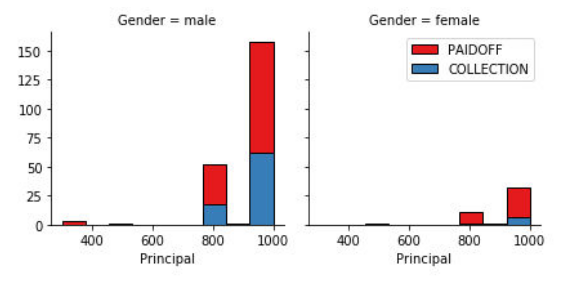

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(10, 5))
plt.imshow(img1, interpolation="bilinear")
plt.axis("off")
plt.show()

### Vẽ biểu đồ theo hình

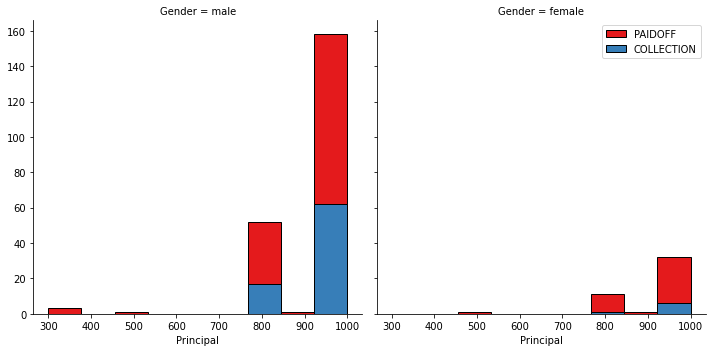

<IPython.core.display.Javascript object>

In [70]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(
    df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, size=5, aspect=1
)
g.map(plt.hist, "Principal", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [71]:
img2 = np.array(Image.open("Age_Male_Female.jpg"))

<IPython.core.display.Javascript object>

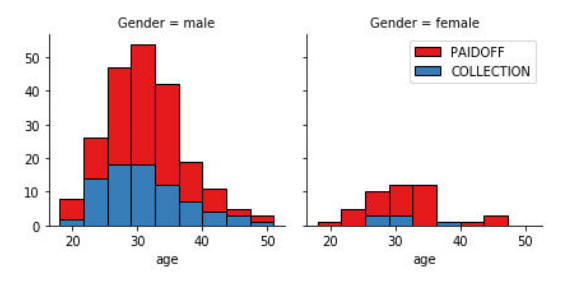

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(10, 5))
plt.imshow(img2, interpolation="bilinear")
plt.axis("off")
plt.show()

### Vẽ biểu đồ theo hình

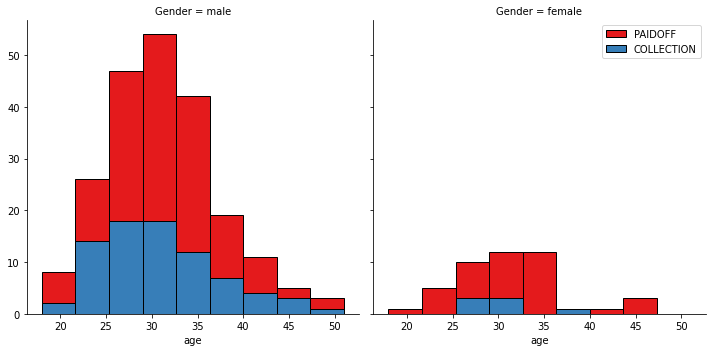

<IPython.core.display.Javascript object>

In [73]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(
    df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, size=5, aspect=1
)
g.map(plt.hist, "age", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [74]:
df["dayofweek"] = df["effective_date"].dt.dayofweek

<IPython.core.display.Javascript object>

In [75]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


<IPython.core.display.Javascript object>

Lets plot some columns to underestand data better:

In [76]:
img3 = np.array(Image.open("day_of_week.jpg"))

<IPython.core.display.Javascript object>

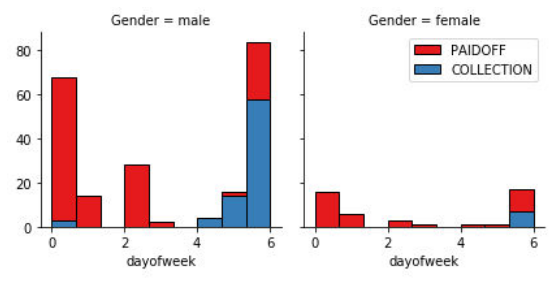

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(10, 5))
plt.imshow(img3, interpolation="bilinear")
plt.axis("off")
plt.show()

### Vẽ biểu đồ theo hình

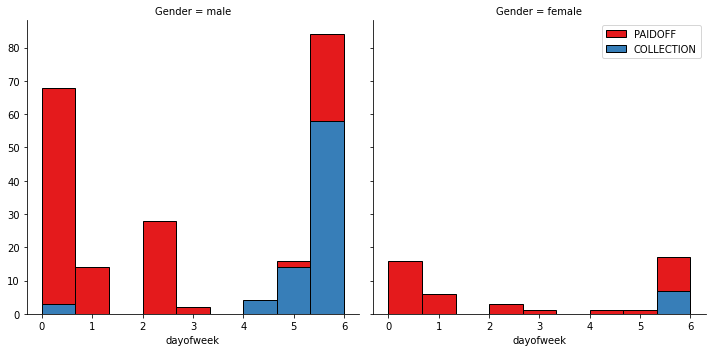

<IPython.core.display.Javascript object>

In [78]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(
    df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2, size=5, aspect=1
)
g.map(plt.hist, "dayofweek", bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [79]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)


<IPython.core.display.Javascript object>

In [80]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


<IPython.core.display.Javascript object>

## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [81]:
df.groupby(["Gender"])["loan_status"].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

<IPython.core.display.Javascript object>

In [82]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


<IPython.core.display.Javascript object>

**xxx** % of female pay there loans while only **xxx** % of males pay there loan

Lets convert male to 0 and female to 1:


In [83]:
df["Gender"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True)


<IPython.core.display.Javascript object>

In [84]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


<IPython.core.display.Javascript object>

## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [85]:
df.groupby(["education"])["loan_status"].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

<IPython.core.display.Javascript object>

#### Feature before One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [86]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


<IPython.core.display.Javascript object>

#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [87]:
Feature = df[["Principal", "terms", "age", "Gender", "weekend"]]
Feature = pd.concat([Feature, pd.get_dummies(df["education"])], axis=1)
Feature.drop(["Master or Above"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [88]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


<IPython.core.display.Javascript object>

### Feature selection

Lets defind feature sets, X:
- X is inputs, X = Features

In [202]:
X = Feature

<IPython.core.display.Javascript object>

In [203]:
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


<IPython.core.display.Javascript object>

What are our lables?
- y is output, y = 'loan_status' column

In [196]:
y = df["loan_status"].values

<IPython.core.display.Javascript object>

In [197]:
y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

<IPython.core.display.Javascript object>

## Scaler Data 

Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [198]:
from sklearn.preprocessing import RobustScaler


<IPython.core.display.Javascript object>

In [204]:
X_new = X.copy()
robustScaler = RobustScaler()
robustScaler.fit(X_new)
X_new = robustScaler.transform(X_new)

<IPython.core.display.Javascript object>

In [205]:
X_new[:5]

array([[ 0.   ,  0.   ,  1.875,  0.   , -1.   ,  0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.375,  1.   , -1.   ,  1.   ,  0.   ,  0.   ],
       [ 0.   , -1.   , -0.375,  0.   , -1.   ,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  0.   , -0.25 ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  0.   , -0.125,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ]])

<IPython.core.display.Javascript object>

# Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

In [208]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


<IPython.core.display.Javascript object>

In [275]:
# khởi tạo model
model = LogisticRegression(multi_class="multinomial")
model_scale = LogisticRegression(multi_class="multinomial")

<IPython.core.display.Javascript object>

In [276]:
# huấn luyện model
model.fit(X_train, y_train)
model_scale.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

<IPython.core.display.Javascript object>

In [254]:
# yhat_train = model.predict(X_train)

<IPython.core.display.Javascript object>

In [255]:
# y_train[:5]
# yhat_train[:5]

# yhat_test = model.predict(X_test)
# yhat_test[:5]

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

<IPython.core.display.Javascript object>

In [277]:
yhat_train_proba = model.predict_proba(X)
yhat_train = model.predict(X)
print("R-squared train: ", model.score(X, y))

R-squared train:  0.7601156069364162


<IPython.core.display.Javascript object>

In [279]:
yhat_train_proba_scale = model_scale.predict_proba(X_new)
yhat_train_scale = model_scale.predict(X_new)
print("R-squared train after scale features: ", model_scale.score(X_new, y))

R-squared train after scale features:  0.7514450867052023


<IPython.core.display.Javascript object>

In [280]:
## Ta nhận thấy model_scale cho kết quả chênh lệch với model gốc ban đầu khoảng
abs(model.score(X, y) - model_scale.score(X_new, y))

0.008670520231213952

<IPython.core.display.Javascript object>

In [281]:
## Do biến output loan_status có 260 học viên đã payoff trong khi chỉ có 86 học viên collection cho thấy dữ liệu bị mất cân bằng, ta áp dụng thêm kỹ thuật resampling để cân bằng lại dữ liệu, sau đó build lại model.

<IPython.core.display.Javascript object>

In [282]:
## resampling cho model gốc, model_scale & tính toán lại độ chính xác:
from imblearn.over_sampling import SMOTE

X_rs, y_rs = SMOTE().fit_resample(X, y)
model_rs = LogisticRegression()
model_rs.fit(X_rs, y_rs)

LogisticRegression()

<IPython.core.display.Javascript object>

In [283]:
X_scale_rs, y_scale_rs = SMOTE().fit_resample(X_new, y)
model_scale_rs = LogisticRegression()
model_scale_rs.fit(X_scale_rs, y_scale_rs)

LogisticRegression()

<IPython.core.display.Javascript object>

In [284]:
yhat_train_proba_rs = model_rs.predict_proba(X_rs)
yhat_train_rs = model_rs.predict(X_rs)
print("R-squared train and resampling: ", model_rs.score(X_rs, y_rs))

R-squared train and resampling:  0.7788461538461539


<IPython.core.display.Javascript object>

In [285]:
yhat_train_proba_scale_rs = model_scale_rs.predict_proba(X_scale_rs)
yhat_train_scale_rs = model_scale_rs.predict(X_scale_rs)
print(
    "R-squared train scaling and resampling: ",
    model_scale_rs.score(X_scale_rs, y_scale_rs),
)

R-squared train scaling and resampling:  0.7634615384615384


<IPython.core.display.Javascript object>

In [222]:
# sau khi resampling, R-squared của cả 2 model đã dc cải thiện

<IPython.core.display.Javascript object>

# Model Evaluation using Test set

In [172]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


<IPython.core.display.Javascript object>

### Load Test set for evaluation 

In [173]:
# Read CSV file: loan_test.csv
# Chú ý: train data có cấu trúc thế nào thì phải chuẩn test data có cấu trúc thế đó!!!
df_test = pd.read_csv("loan_test.csv", usecols=[2, 3, 4, 5, 6, 7, 8, 9])
df_test.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


<IPython.core.display.Javascript object>

In [174]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     54 non-null     object
 1   Principal       54 non-null     int64 
 2   terms           54 non-null     int64 
 3   effective_date  54 non-null     object
 4   due_date        54 non-null     object
 5   age             54 non-null     int64 
 6   education       54 non-null     object
 7   Gender          54 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.5+ KB


<IPython.core.display.Javascript object>

In [286]:
df_test["due_date"] = pd.to_datetime(df["due_date"])
df_test["effective_date"] = pd.to_datetime(df["effective_date"])
df_test["Gender"].replace(to_replace=["male", "female"], value=[0, 1], inplace=True)
df_test["dayofweek"] = df["effective_date"].dt.dayofweek
df_test['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)


<IPython.core.display.Javascript object>

In [302]:
Feature_test = df_test[["Principal", "terms", "age", "Gender", "weekend"]]
Feature_test = pd.concat([Feature_test, pd.get_dummies(df_test["education"])], axis=1)
Feature_test.drop(["Master or Above"], axis=1, inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


<IPython.core.display.Javascript object>

In [305]:
# X_test cho model
X_test = Feature_test

<IPython.core.display.Javascript object>

In [306]:
## Tạo X test model scale

scaler = RobustScaler()
X_test_scale = scaler.fit_transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X.columns, index=X_test.index)
X_test_scale.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0.0,0.000000,2.4375,1.0,-1.0,1.0,0.0,0.0
1,-3.5,-1.533333,0.5625,0.0,-1.0,0.0,0.0,0.0
2,0.0,0.000000,1.5625,1.0,-1.0,0.0,1.0,0.0
3,0.0,0.000000,-0.5625,0.0,0.0,0.0,0.0,1.0
4,-1.0,-1.000000,-0.1875,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

In [307]:
# y_test cho model
y_test = df_test["loan_status"]

<IPython.core.display.Javascript object>

In [309]:
# # np_test = df_new_test_2.to_numpy()
# np_test = X_test.to_numpy()
# np_test

<IPython.core.display.Javascript object>

In [310]:
# yhat_new = model.predict(np_test)
# # yhat_new

<IPython.core.display.Javascript object>

In [297]:
# Model Evaluation

<IPython.core.display.Javascript object>

In [311]:
## Model:
yhat_test = model.predict(X_test)
yhat_test_prob = model.predict_proba(X_test)
yhat_test_prob[0:5]

array([[0.01654741, 0.98345259],
       [0.16683018, 0.83316982],
       [0.01523171, 0.98476829],
       [0.41340995, 0.58659005],
       [0.55249442, 0.44750558]])

<IPython.core.display.Javascript object>

In [312]:
print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

[[ 0 14]
 [ 6 34]]
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.71      0.85      0.77        40

    accuracy                           0.63        54
   macro avg       0.35      0.42      0.39        54
weighted avg       0.52      0.63      0.57        54



<IPython.core.display.Javascript object>

In [313]:
## Model scale:
yhat_scale_test = model_scale.predict(X_test_scale)
yhat_scale_test_prob = model_scale.predict_proba(X_test_scale)
yhat_scale_test_prob[0:5]

array([[0.0238791 , 0.9761209 ],
       [0.04935208, 0.95064792],
       [0.01926335, 0.98073665],
       [0.39183206, 0.60816794],
       [0.47672964, 0.52327036]])

<IPython.core.display.Javascript object>

In [314]:
print(confusion_matrix(y_test, yhat_scale_test))
print(classification_report(y_test, yhat_scale_test))

[[ 0 14]
 [ 0 40]]
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



<IPython.core.display.Javascript object>

In [315]:
## Model resampling:
yhat_rs_test = model_rs.predict(X_test)
yhat_rs_test_prob = model_rs.predict_proba(X_test)
yhat_rs_test_prob[0:5]

array([[0.01199531, 0.98800469],
       [0.28176817, 0.71823183],
       [0.01939798, 0.98060202],
       [0.65243838, 0.34756162],
       [0.54029939, 0.45970061]])

<IPython.core.display.Javascript object>

In [316]:
print(confusion_matrix(y_test, yhat_rs_test))
print(classification_report(y_test, yhat_rs_test))

[[10  4]
 [28 12]]
              precision    recall  f1-score   support

  COLLECTION       0.26      0.71      0.38        14
     PAIDOFF       0.75      0.30      0.43        40

    accuracy                           0.41        54
   macro avg       0.51      0.51      0.41        54
weighted avg       0.62      0.41      0.42        54



<IPython.core.display.Javascript object>

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [317]:
## Model scaling & resampling:
yhat_scale_rs_test = model_scale_rs.predict(X_test_scale)
yhat_scale_rs_test_prob = model_scale_rs.predict_proba(X_test_scale)
yhat_scale_rs_test_prob[0:5]

array([[0.03465179, 0.96534821],
       [0.06343983, 0.93656017],
       [0.04034363, 0.95965637],
       [0.70233416, 0.29766584],
       [0.65939858, 0.34060142]])

<IPython.core.display.Javascript object>

In [318]:
print(confusion_matrix(y_test, yhat_scale_rs_test))
print(classification_report(y_test, yhat_scale_rs_test))

[[12  2]
 [33  7]]
              precision    recall  f1-score   support

  COLLECTION       0.27      0.86      0.41        14
     PAIDOFF       0.78      0.17      0.29        40

    accuracy                           0.35        54
   macro avg       0.52      0.52      0.35        54
weighted avg       0.65      0.35      0.32        54



<IPython.core.display.Javascript object>

| Algorithm          | Accuracy Score | Precision | Recall | F-Score
|--------------------|---------|---------|---------|---------|
| LogisticRegression | ?       | ?       | ?       | ?       | 

In [319]:
from sklearn.metrics import confusion_matrix, classification_report

<IPython.core.display.Javascript object>

In [324]:
payoff_model_report = [
    [0.74, 0.75, 0.97, 0.85],
    [0.76, 0.75, 1.00, 0.86],
    [0.67, 0.84, 0.68, 0.75],
    [0.65, 0.89, 0.60, 0.72],
]
idx_report = ["model", "model_scale", "model_rs", "model_scale_rs"]
col_report = ["Accuracy Score", "Precision", "Recall", "F1 Score"]
df_report = pd.DataFrame(
    payoff_model_report, index=pd.Index(idx_report, name="Model"), columns=col_report
)
df_report

,Accuracy Score,Precision,Recall,F1 Score
Model,,,,
model,0.74,0.75,0.97,0.85
model_scale,0.76,0.75,1.00,0.86
model_rs,0.67,0.84,0.68,0.75
model_scale_rs,0.65,0.89,0.60,0.72


<IPython.core.display.Javascript object>

In [325]:
## => Chọn model_scale vì cho F1 score cao nhất.

<IPython.core.display.Javascript object>

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>